In [21]:
import earthaccess
import rioxarray
import rasterio
import xarray as xr
import numpy as np
from timebudget import timebudget

In [2]:
results = earthaccess.search_data(
    short_name="MUR-JPL-L4-GLOB-v4.1",
    #temporal=("2020-01-01", "2021-12-31"),
    temporal=("2019-01-01", "2019-01-31"),
)


Granules found: 31


In [23]:
%%time

import os
from pathlib import Path
cookies = os.path.expanduser("~/.urs_cookies")
Path(cookies).touch()

## pull out the URLs
data_links = [granule.data_links(access="external") for granule in results]
url_links = [f'{link[0]}' for link in data_links]
# and here we go
with rasterio.Env(GDAL_HTTP_COOKIEFILE=cookies, 
                GDAL_HTTP_COOKIEJAR=cookies, 
                GDAL_HTTP_NETRC=True):
    ds = xr.open_mfdataset(url_links, 
                           engine = "rasterio", 
                           concat_dim="time", 
                           combine="nested",
                           parallel=True)


ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.

ERROR 10: Pointer 'hObject' is NULL in 'GDALGetMetadata'.



CPU times: user 1.56 s, sys: 162 ms, total: 1.72 s
Wall time: 10.9 s


CPU times: user 5.81 s, sys: 387 ms, total: 6.2 s
Wall time: 43.6 s


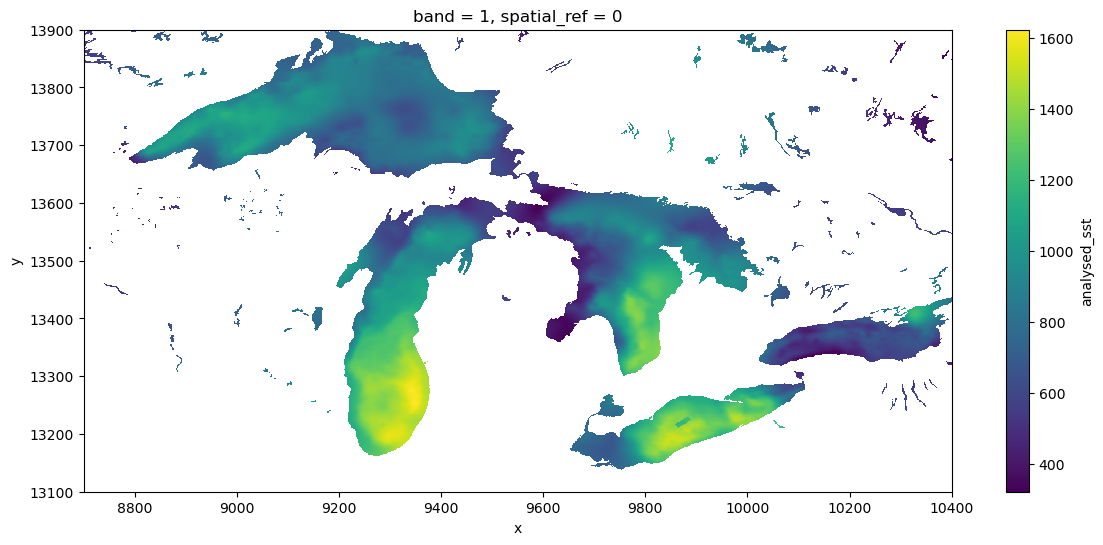

In [24]:
%%time
# older versions of gdal give wrong spatial coods
dds = ds1.sel(x=slice(18000-9300, 18000-7600), y = slice(9000+4100,9000+4900))
cond = (dds.sea_ice_fraction < 0.15) | np.isnan(dds.sea_ice_fraction)
result = dds.analysed_sst.where(cond)
result.std("time").plot(figsize=(14, 6), x="x", y="y")

In [ ]:
%%time

files = earthaccess.open(results)
ds = xr.open_mfdataset(files,
                     decode_times=False, 
                     data_vars=['analysed_sst', 'sea_ice_fraction'], 
                     concat_dim="time", 
                     combine="nested",
                     parallel=True)

dds = ds2.sel(lon=slice(-93, -76), lat=slice(41, 49))
cond = (dds.sea_ice_fraction < 0.15) | np.isnan(dds.sea_ice_fraction)
result = dds.analysed_sst.where(cond)
result.std("time").plot(figsize=(14, 6), x="lon", y="lat")

 Opening 31 granules, approx size: 11.63 GB


QUEUEING TASKS | : 0it [00:00, ?it/s]

PROCESSING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/31 [00:00<?, ?it/s]